Online Process Dynamics and Control Worksheets Using Jupyter Notebooks
===

Carl Sandrock
---

EBIT Teaching & Learning Seminar and Workshop, 2015-11-18



In [13]:
import sympy
import matplotlib.pyplot as plt
import numpy
sympy.init_printing(use_latex="mathjax")
%matplotlib inline

In [95]:
plt.style.use('fivethirtyeight')

In [96]:
### DON'T DO THIS FOR PRODUCTION CODE
import warnings
warnings.filterwarnings("ignore")

Traditional Process Dynamics material
--
Tedious manual calculations

<img src="partialfractions.png"/>

(Seborg, Edgar & Melichamp, 2nd edition slides)

Computer algebra
--

In [97]:
s = sympy.Symbol('s')

Y = (s + 5)/((s + 1)*(s + 4))
sympy.apart(Y)

      1           4    
- ───────── + ─────────
  3⋅(s + 4)   3⋅(s + 1)

**Interact**

In [98]:
t = sympy.Symbol('t', positive=True)

y = sympy.inverse_laplace_transform(Y, s, t).expand()
y

   -t    -4⋅t
4⋅ℯ     ℯ    
───── - ─────
  3       3  

Plotting
----
We can plot the result directly inside the environment

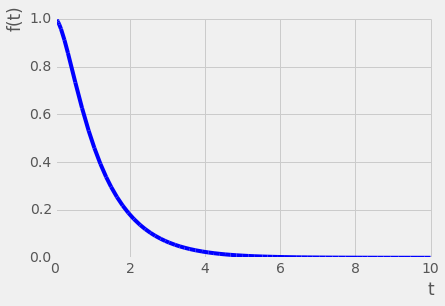

In [103]:
sympy.plot(y, (t, 0, 10));

Static pictures in textbook
--

Step response of a second order system

$$G(s) = \frac{KM}{\tau^2s^2 + 2\tau\zeta s + 1}$$

<img width="500px" src="secondorder_response.png"/>

In [104]:
tau, zeta, t, w, K = sympy.symbols('tau, zeta, t, w, K', real=True, positive=True)

LHS = sympy.Matrix([[2*tau*zeta, tau**2],
                    [1, 0]])
RHS1 = sympy.Matrix([[-1, 0],
                    [0, 1]])

A = LHS.inv()*RHS1
B = LHS.inv()*sympy.Matrix([K, 0])
x0 = -A.inv()*B
stepresponse = (x0 - sympy.exp(A*t)*x0)[0,0]
roots = list(A.eigenvals().keys())

In [105]:
tmax = 30
ts = numpy.linspace(0, tmax, 100)

def secondorder(K_in, tau_in, zeta_in):
    values = {K: K_in, tau: tau_in, zeta: zeta_in}
    AA = A.subs(values)
    stepresponse = sympy.re((x0.subs(values) - sympy.exp(AA*t)*x0.subs(values))[0,0])
    evalf = sympy.lambdify((t,), stepresponse, modules=['numpy', 'sympy', 'mpmath'])
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Step response')
    tau_height = evalf(tau_in)
    plt.plot(ts, evalf(ts))
    plt.axhline(K_in)
    plt.plot([0, tau_in, tau_in], [tau_height]*2 + [0], alpha=0.4)
    plt.text(0, K_in, '$K=${}'.format(K_in))
    plt.text(0, tau_height, '{:.3}$K$'.format(tau_height))
    plt.text(tau_in, 0, r'$\tau={:.3}$'.format(tau_in))
    plt.ylim(0, 10)
    plt.subplot(1, 2, 2)
    plt.title('Poles plot')
    realpart = [sympy.re(r.subs(values)) for r in roots]
    imagpart = [sympy.im(r.subs(values)) for r in roots]
    plt.scatter(realpart, imagpart, s=60)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.axis([-2, 2, -2, 2])

In [106]:
from ipywidgets import interact

Interactive graphics
--

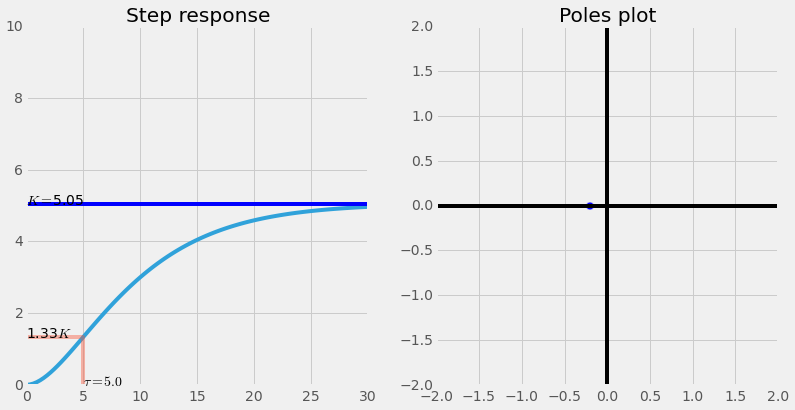

In [107]:
interact(secondorder, K_in=(0.1, 10.), tau_in=(0., 10.), zeta_in=(0., 2));

Block diagram algebra
==

<img src="blockdiagram_solution1.png"/>

(continued)

<img src="blockdiagram_solution2.png"/>

(continued)

<img src="blockdiagram_solution3.png"/>

Symbolic math solution
--

<img src="blockdiagram_problem.png"/>

In [22]:
(R, V1, V2, V3, V4, V5, V6, V7, V8, C,
 G1, G2, G3, H1, H2, H3) = sympy.symbols('R, V1, V2, V3, V4, V5, V6, V7, V8, C,'
                                         'G1, G2, G3, H1, H2, H3')
unknowns = V1, V2, V3, V4, V5, V6, V7, V8, C

In [23]:
eqs = [
       V1 - (R - V6), V2 - G1*V1, V3 - (V2 - V7),  V4 - G2*V3,  V5 - (V4 + V3 - V8), C - G3*V5,
                                                   V6 - H1*V4,                       V7 - H2*V4,
                      V8 - H3*C,
       # Sums
       ]

In [24]:
sol = sympy.solve(eqs, unknowns)
sol[C].factor()/R

          G₁⋅G₃⋅(G₂ + 1)          
──────────────────────────────────
(G₃⋅H₃ + 1)⋅(G₁⋅G₂⋅H₁ + G₂⋅H₂ + 1)

Beyond the book
--

Interactivity is powerful

In [61]:
from ipywidgets import interact, Checkbox

In [62]:
f = numpy.sin

maxt = 100
t = numpy.linspace(0, maxt, 1000)
y = f(t)

In [67]:
def show_sampled(T=5.5, show_f=True):
    t_sampled = numpy.arange(0, maxt, T)
    y_sampled = f(t_sampled)

    if show_f:
        plt.plot(t, y, alpha=0.6)
    plt.scatter(t_sampled, y_sampled, s=60)
    plt.xlim(0, maxt)

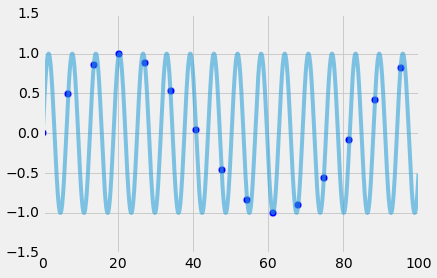

In [68]:
interact(show_sampled, T=(0.1, 10), show_f=Checkbox());

Multimedia
--

In [69]:
from IPython.display import Audio

In [70]:
fs = 44100 # sampling frequency
T = 0.5 # seconds
A = 440
twopi = 2*numpy.pi

t = numpy.linspace(0, T, int(T*fs), endpoint=False) # time variable
def note(frequency):
    return numpy.sin(twopi*frequency*t)                # pure sine wave at 440 Hz

# load a NumPy array
Audio(note(A), rate=fs)

Play a scale
--

In [71]:
scalet = numpy.linspace(0, T*13, int(T*fs*13), endpoint=False)
scale = numpy.concatenate([note(A*2**(i/12.)) for i in range(13)])
Audio(scale, rate=fs)

What about a real song?
--

In [72]:
import scipy.io.wavfile

In [73]:
samplingrate, song = scipy.io.wavfile.read('rapmusic.wav')
samplelength = 7*samplingrate
songsample = song.sum(axis=1)[:samplelength]

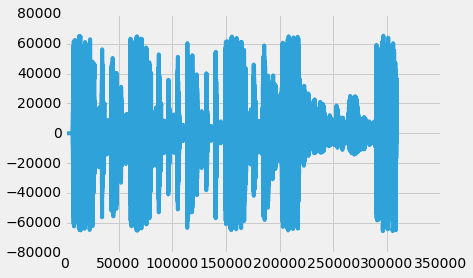

In [75]:
plt.plot(songsample);

In [76]:
Audio(songsample, rate=samplingrate)

Now we can filter it
---

In [77]:
omega = 440*twopi  # (440 cycles/second)*(2 pi radians / cycle)
tau = 1/omega
first_order_impulse = numpy.exp(-t/tau)

In [78]:
def filtersignal(signal):
    return numpy.convolve(signal, first_order_impulse)[:len(signal)]

In [79]:
filtered = filtersignal(songsample)
Audio(filtered, rate=samplingrate)

The technology
===

* [Python](https://www.python.org/)
* [Jupyter notebooks](http://jupyter.org/)
* [SymPy](http://www.sympy.org/) for symbolics
* [NumPy](http://www.numpy.org/), [SciPy](http://www.scipy.org/), [matplotlib](http://matplotlib.org/)

You'll probably want a distribution, like [Anaconda](https://www.continuum.io/downloads)

My notebooks are hosted [on GitHub](https://github.com/alchemyst/Dynamics-and-Control), rendered by the [Jupyter Notebook Viewer](http://nbviewer.ipython.org/)

This notebook is enhanced by [RISE](https://github.com/damianavila/RISE) presentation mode.

If you want to play, you can get a temporary online notebook at [tmpnb.org](http://tmpnb.org)

Bona fides
---

* IPython Notebooks covered in [Nature in November 2014](http://www.nature.com/news/ipython-interactive-demo-7.21492?article=1.16261)
* Jupyter (the new name for IPython notebooks) received [$6m in funding](http://blog.jupyter.org/2015/07/07/jupyter-funding-2015/) in July 2015